# Age Curves for Goalies in the NHL

In [2]:
#Import the appropriate packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import the package for LOESS
import statsmodels.api as sm
import os

#Set the working directory
os.chdir("C:\\Users\\justi\\Desktop\\2025\\DSCI 235\\DSCI235-Project\\235_Project")

In [3]:

#Load in the data
goalie_df = pd.read_csv("goalie_data.csv")

#Look at the data
goalie_df.head()



,Unnamed: 0,Rk,Player,Age,Team,Pos,GP,GS,W,L,...,RBS,GA%-,GSAA,GAA/A,GPS,G,A,PTS,PIM,Awards
0,0,1,Devan Dubnyk,32.0,MIN,G,67,66,31,28,...,13,96.0,6.2,2.69,11.1,0,2,2,2,ASG
1,1,2,Carey Price,31.0,MTL,G,66,64,35,24,...,6,92.0,14.9,2.64,12.5,0,1,1,2,ASnhl-3Vezina-7
2,2,3,Connor Hellebuyck,25.0,WPG,G,63,62,34,23,...,6,97.0,5.9,3.09,12.1,0,3,3,4,NaN
3,3,4,Sergei Bobrovsky,30.0,CBJ,G,62,61,37,24,...,13,97.0,5.3,2.75,10.4,0,0,0,2,ASnhl-11Vezina-9
4,4,5,Martin Jones,29.0,SJS,G,62,62,36,19,...,14,115.0,-22.9,3.14,7.0,0,1,1,2,NaN


In [6]:
#Define the predictor and response
x = goalie_df['Age'].values
y = goalie_df['SV%'].values

#Sort the values by age for plotting later
index = np.argsort(x)
x_g = x[index]
y_g = y[index]

#Fit the loess model using the statsmodels package
#(start with a small smoothing parameter to capture local detail try others later
loess = sm.nonparametric.lowess

#Set the smoothing parameter so we can fiddle with it
frac_val= 0.15
goalie_fit = loess(y_g, x_g, frac=frac_val, return_sorted=True)

#Extract the fitted values
x_fit = goalie_fit[:,0]
y_fit = goalie_fit[:,1]

#Use bootstrap sampling to calculate the standard error to include in the plot:

#Set the number of boots and create a place to store the reuslts
n_boot = 250
#use nan's instaead of zeros because it was forcing the se to be the same at the ends where there was no support
y_boots= np.full((n_boot,len(x_fit)), np.nan)

#Use a for loop to complete the sampling
for i in range(n_boot):
    
    #Sample with replacement
    sample_idx = np.random.choice(len(x_g), size=len(x_g), replace=True)
    x_sample = x_g[sample_idx]
    y_sample = y_g[sample_idx]

    #Fit the loess 
    loess_boot = loess(y_sample,x_sample,frac=frac_val, return_sorted=True)

    #Extract the results
    x_b = loess_boot[:, 0]
    y_b = loess_boot[:, 1]

    #Use left and right nans to have it only compute se where the loess boot has support
    #Otherwise it will force the tails to have the same se as the rest of the data 
    interp = np.interp(x_fit, x_b, y_b, left=np.nan, right=np.nan)

    #Store the results
    y_boots[i, :] = interp


#Calculate the standard error and ignore the nans
y_std = np.nanstd(y_boots, axis=0)

#Calculate the uper and lower bounds for the 95% CI
y_upper = y_fit + 1.96 * y_std
y_lower = y_fit - 1.96 * y_std






Thought Process:



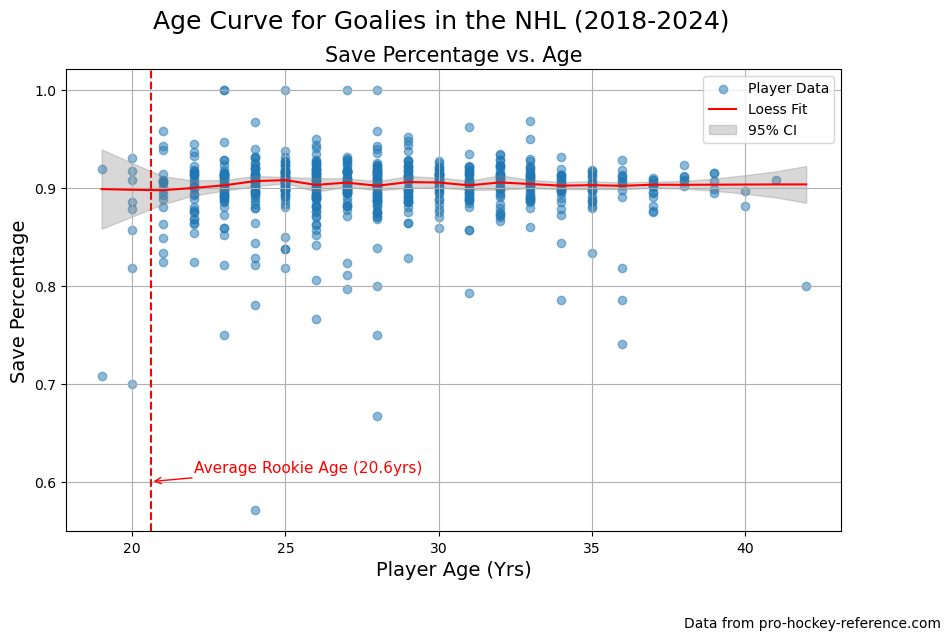

In [7]:
#Plot the results
plt.figure(figsize=(10,6))

#Add the data as a scatter plot
plt.scatter(y=y, x= x, alpha=0.5, label= "Player Data")

#Add the loess curve
plt.plot(x_fit , y_fit, color="red", label= "Loess Fit")

#Add the confidence intervals
plt.fill_between(x_fit, y_lower,y_upper, color='gray', alpha=0.3, label="95% CI")

#Add a vertical line for the mean age of a rookie in the nhl
#source: https://pmc.ncbi.nlm.nih.gov/articles/PMC4035396/
plt.axvline(x=20.6, color='red', linestyle='--')

#Add appropriate labels and title
plt.suptitle("Age Curve for Goalies in the NHL (2018-2024)", fontsize=18)
plt.ylabel("Save Percentage", fontsize=14)
plt.xlabel("Player Age (Yrs)", fontsize=14)
plt.title("Save Percentage vs. Age", fontsize=15)
plt.figtext(1,-0.05,"Data from pro-hockey-reference.com", ha='right')

#Add a text annotation that indicates that the red vertical line is the mean age for rookies in the nhl
plt.annotate("Average Rookie Age (20.6yrs)",
             xy=(20.6, 0.6),
             xytext=(22,0.6+0.01),
             arrowprops=dict(arrowstyle= "->", color='red'),
             color='red',
             fontsize=11)

#Add the grid lines for easy viewing
plt.grid(True)

#Add the legend
plt.legend()


#Display the plot
plt.show()


explanation takeaways 

think about age vs. num active years confirm 